In [4]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("Churn_Modelling.csv")

x = dataset.iloc[:,3:13].values
x
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
x[:,1] = labelencoder.fit_transform(x[:,1])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [7]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Country', OneHotEncoder(), [1])], remainder='passthrough')
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [38]:
x = pd.DataFrame(x, columns = ["X1", "X2", "X3", "CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
x

,X1,X2,X3,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,NaN,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,NaN,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,NaN,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,NaN,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,NaN,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,NaN,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,NaN,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,NaN,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [12]:
x = x.drop("X1", axis = 1)
x

#Apple = 1-Banana-Mangoes

,X2,X3,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [40]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

classifier=sm.Logit(y_train,x_train)
model=classifier.fit()
model.summary()


#remove the values which has P range from -ve to +ve (because they are insignificant)
#high linear r-square means good fit
#for logit, we look at pseudo r-square (20-40 is good fit)

Optimization terminated successfully.
         Current function value: 0.429005
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.1520
Time:                        09:15:09   Log-Likelihood:                -3432.0
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.787e-257
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1             0.3563      0.033     10.900      0.000       0.292       0.420
x2             0.0484      0.034      1.435      0.151      -0.018       0.115
x3            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x4            -0.2695      0.030     -8.888      0.000      -0.329      -0.210
x5             0.7526      0.030     25.037      0.000       0.694       0.811
x6            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x7             0.1537      0.036      4.283      0.000       0.083       0.224
x8            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x9            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x10           -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x11            0.0292      0.030      0.960      0.337      -0.030       0.089
==============================================================================
"""

In [21]:
y_pred = model.predict(x_test)

Accuracy: 0.812
[[1503   92]
 [ 284  121]]


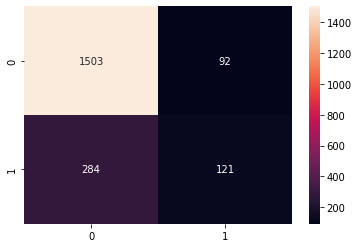

In [37]:
import seaborn as sns
from sklearn import metrics

y_pred = model.predict(x_test)
y_pred = (y_pred>0.45) #play around with cutoff to get the max accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot = True, fmt = '')